In [256]:
#Import Libraries
import os
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import plotly.express as px
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import pickle

### Read dataset

In [229]:
data = pd.read_csv('loan_prediction.csv') #import the train dataset


In [230]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [231]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


### print out sum of null values in each column

In [232]:
data.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### I used the seaborn heatmap to visualize null values in each column

<AxesSubplot:>

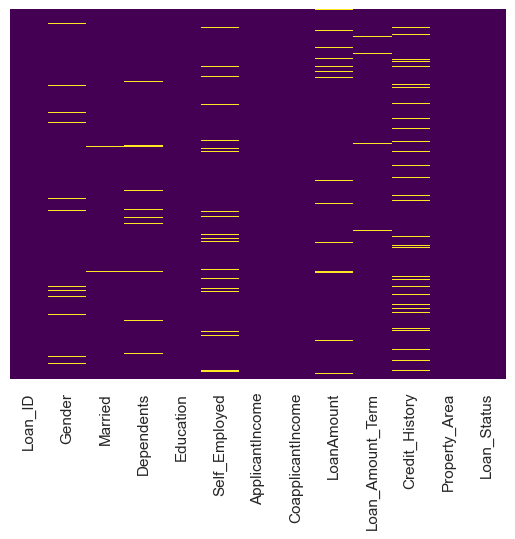

In [233]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

# Relationship between Gender and Loan Status:

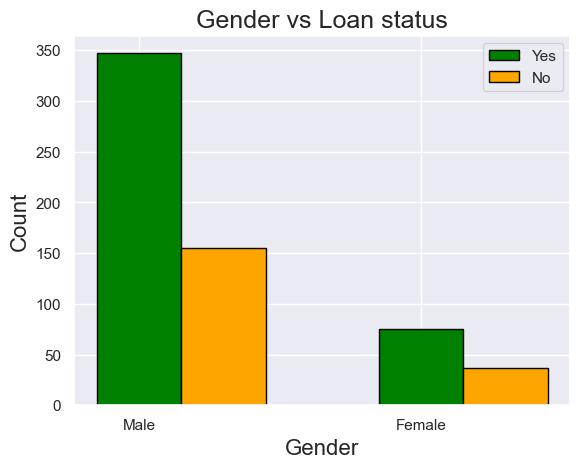

In [234]:


Gender = ['Male', 'Female']
Loan_Status = ['Yes', 'No']
pos= np.arange(len(Gender))
bar_width= 0.30
Loan_Status_Yes= [347,75]
Loan_Status_NO= [155,37]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Gender)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Gender vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

# Relationship between marital status vs loan status

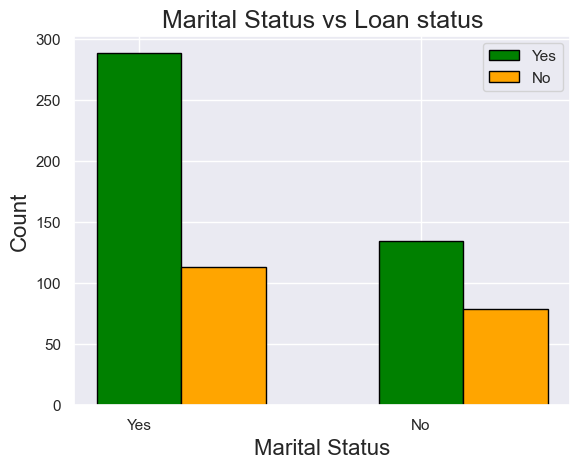

In [235]:


MaritalStatus=['Yes', 'No']
Loan_Status=['Yes', 'No']
pos=np.arange(len(MaritalStatus))
bar_width=0.30
Loan_Status_Yes=[288,134]
Loan_Status_NO=[113,79]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, MaritalStatus)
plt.xlabel('Marital Status', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Marital Status vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

# Relationship Between Dependents vs Loan status

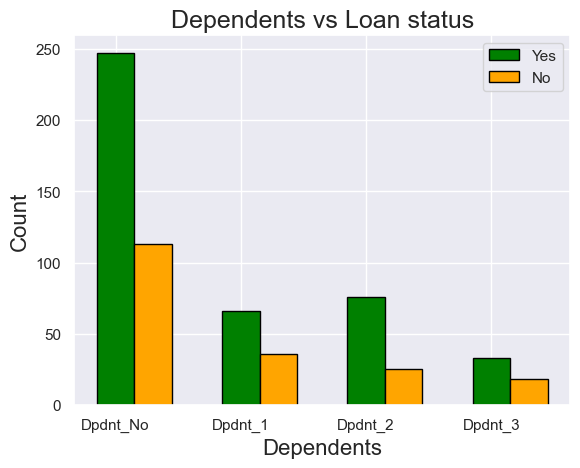

In [236]:



Dependents=['Dpdnt_No', 'Dpdnt_1', 'Dpdnt_2', 'Dpdnt_3']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Dependents))
bar_width=0.30
Loan_Status_Yes=[247,66,76,33]
Loan_Status_NO=[113,36,25,18]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Dependents)
plt.xlabel('Dependents', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Dependents vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

# Relationship between education vs Loan status:

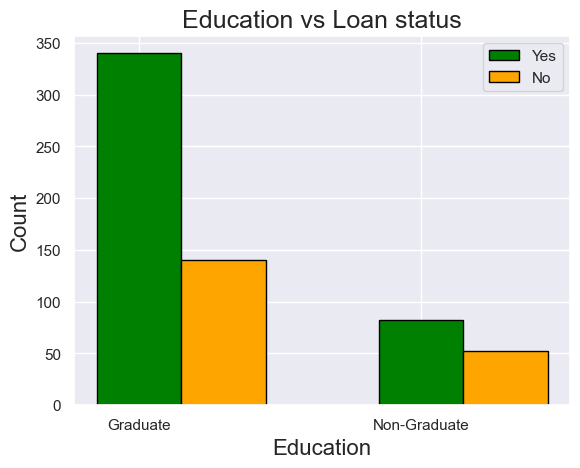

In [237]:



Education=['Graduate', 'Non-Graduate']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Education))
bar_width=0.30
Loan_Status_Yes=[340,82]
Loan_Status_NO=[140,52]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Education)
plt.xlabel('Education', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Education vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

# Relationship between Self-Employed vs Loan_Status:

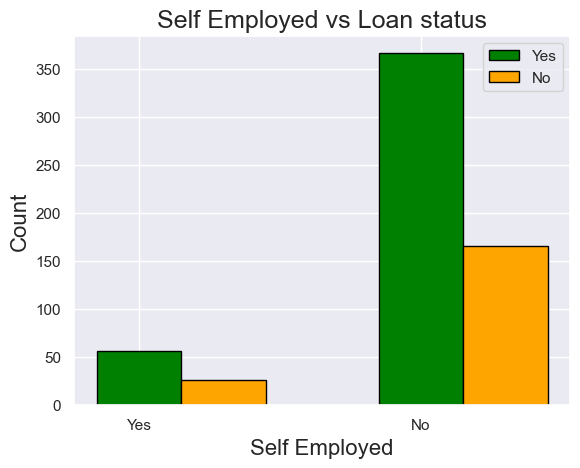

In [238]:
Self_Employed=['Yes', 'No']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Self_Employed))
bar_width=0.30
Loan_Status_Yes=[56,366]
Loan_Status_NO=[26,166]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Self_Employed)
plt.xlabel('Self Employed', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Self Employed vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

# Relationship between Property area and loan status

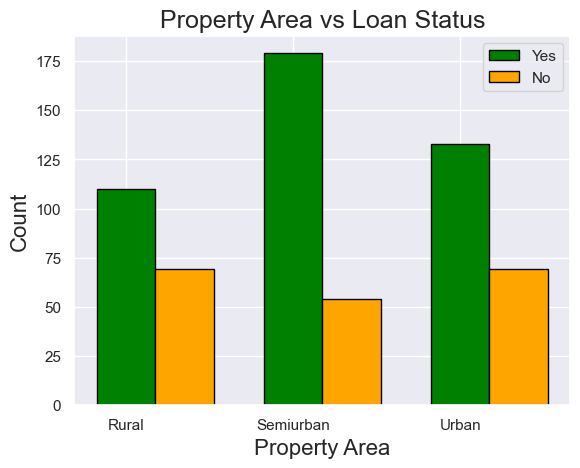

In [239]:


Property_Area=['Rural','Semiurban','Urban']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Property_Area))
bar_width=0.35
Loan_Status_Yes=[110,179,133]
Loan_Status_NO=[69,54,69]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Property_Area)
plt.xlabel('Property Area', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Property Area vs Loan Status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()


#  Relationship between Credit History and Loan Status: 

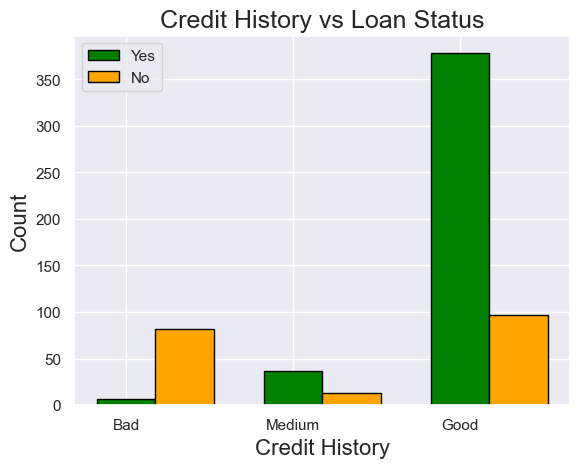

In [240]:


Credit_History=['Bad','Medium','Good']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Credit_History))
bar_width=0.35
Loan_Status_Yes=[7,37,378]
Loan_Status_NO=[82,13,97]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Credit_History)
plt.xlabel('Credit History', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Credit History vs Loan Status',fontsize=18)
plt.legend(Loan_Status,loc=2)
plt.show()

### Plot a  correlation heatmap

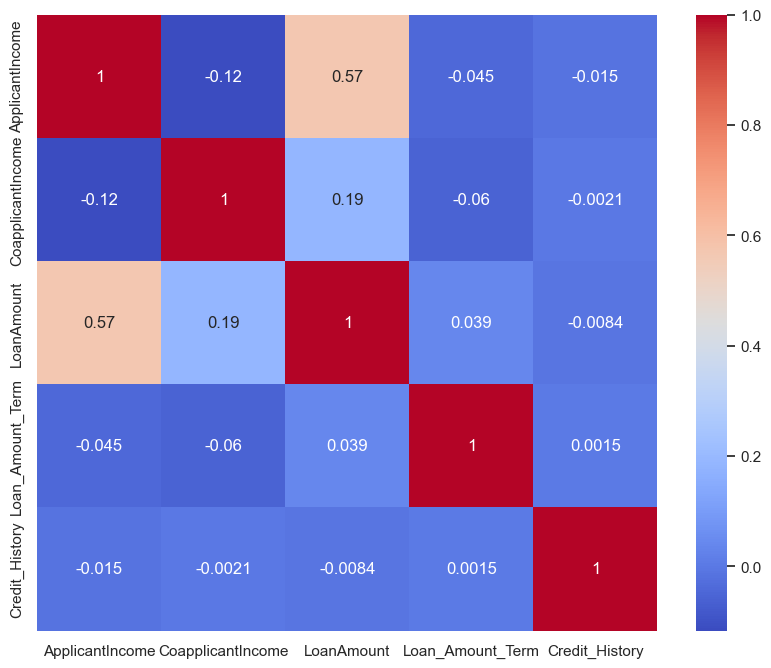

In [241]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm');

# Print out column with unique values

In [242]:

for col in data.columns:
    if data[col].dtypes == 'object':
        num_of_unique_cat = len (data[col].unique())
        print("Features '{col_name}' has '{unique_cat}' unique categories". format(col_name=col, unique_cat=num_of_unique_cat))

Features 'Loan_ID' has '614' unique categories
Features 'Gender' has '3' unique categories
Features 'Married' has '3' unique categories
Features 'Dependents' has '5' unique categories
Features 'Education' has '2' unique categories
Features 'Self_Employed' has '3' unique categories
Features 'Property_Area' has '3' unique categories
Features 'Loan_Status' has '2' unique categories


# Perpocessing Data 

## Replace The Null Value

In [243]:
#Now let’s fill in the missing values. In categorical columns, we can fill in missing values with the mode of each column.
#The mode represents the value that appears most often in the column and is an appropriate choice when dealing with categorical data
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
# Fill missing values in numerical column
#We can fill in the missing values of the loan amount column with the median value.
#The median is an appropriate measure to fill in missing values when dealing with skewed distributions or when outliers are present in the data.
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

#We can fill in the missing values of the loan amount term column with the mode value of the column. Since the term of the loan amount is a discrete value, the mode is an appropriate metric to use
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

#We can fill in the missing values of the credit history column with the mode value.
#Since credit history is a binary variable (0 or 1), the mode represents the most common value and is an appropriate choice for filling in missing values.
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)


### plot heatmap after replacing null value

<AxesSubplot:>

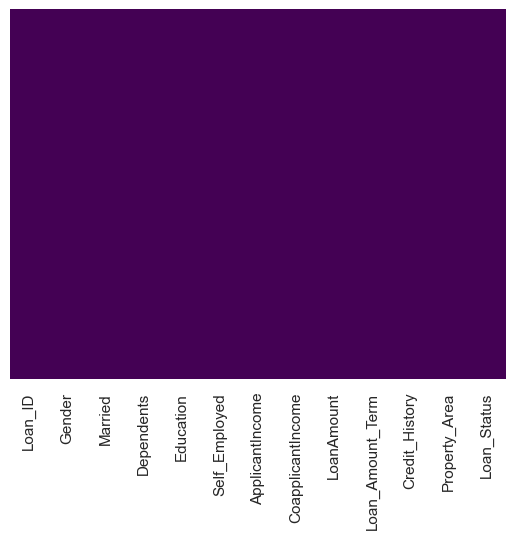

In [244]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') #i used the seaborn heatmap to visualize null values in each column

### Scatter plot 

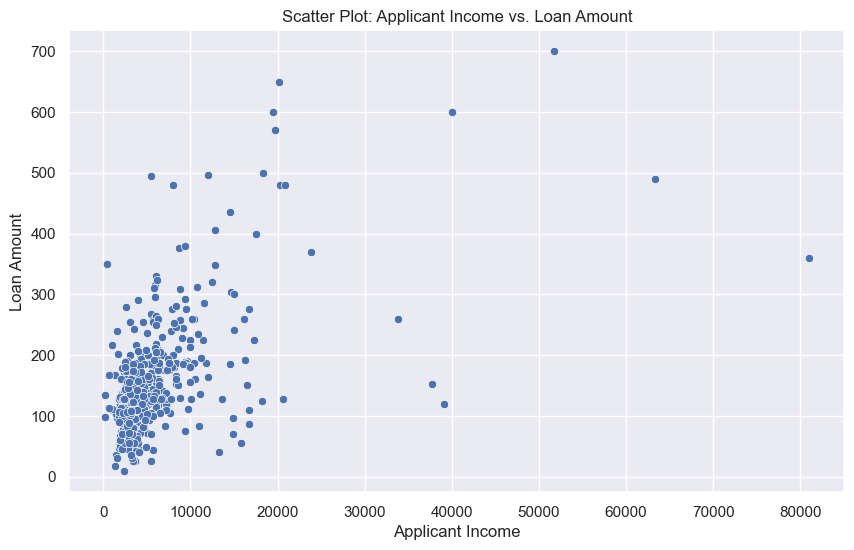

In [245]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='ApplicantIncome', y='LoanAmount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: Applicant Income vs. Loan Amount')
plt.savefig('Scatter Plot.png')
plt.show()


### *Detecting outliers and removing them*ted outliers

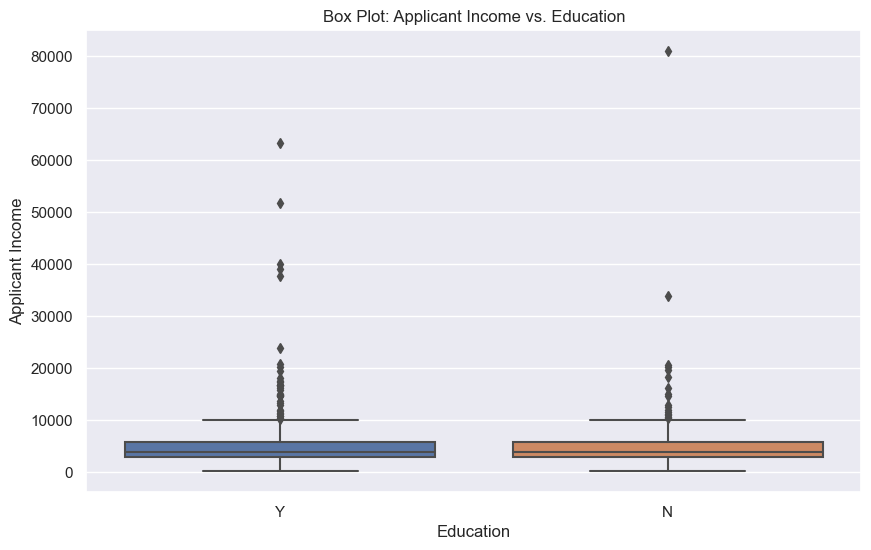

In [246]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Loan_Status', y='ApplicantIncome')
plt.ylabel('Applicant Income')
plt.xlabel('Education')
plt.title('Box Plot: Applicant Income vs. Education')
plt.savefig('outliers.png')
plt.show()

In [247]:
# The “ApplicantIncome” column contains outliers which need to be removed before moving further. Here’s how to remove the outliers:

# Calculate the IQR
Q1 = data['ApplicantIncome'].quantile(0.25)
Q3 = data['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['ApplicantIncome'] >= lower_bound) & (data['ApplicantIncome'] <= upper_bound)]




# The income of the loan co-applicant also contains outliers. Let’s remove the outliers from this column as well:


# Calculate the IQR

Q1= data['CoapplicantIncome'].quantile(0.25)

Q3 = data['CoapplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

# Define the lower and upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR


# Remove outliers

data= data[(data['CoapplicantIncome'] >= lower_bound) & (data['CoapplicantIncome'] <= upper_bound)]



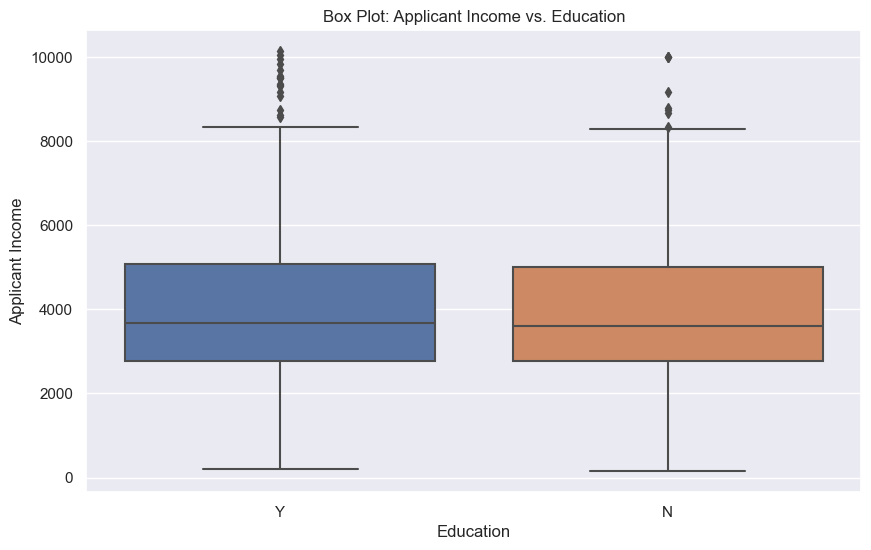

In [248]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Loan_Status', y='ApplicantIncome')
plt.ylabel('Applicant Income')
plt.xlabel('Education')
plt.title('Box Plot: Applicant Income vs. Education')
plt.savefig('Scatter Plot.png')
plt.show()



### The scatter plot after remove outliers from ApplicantIncome


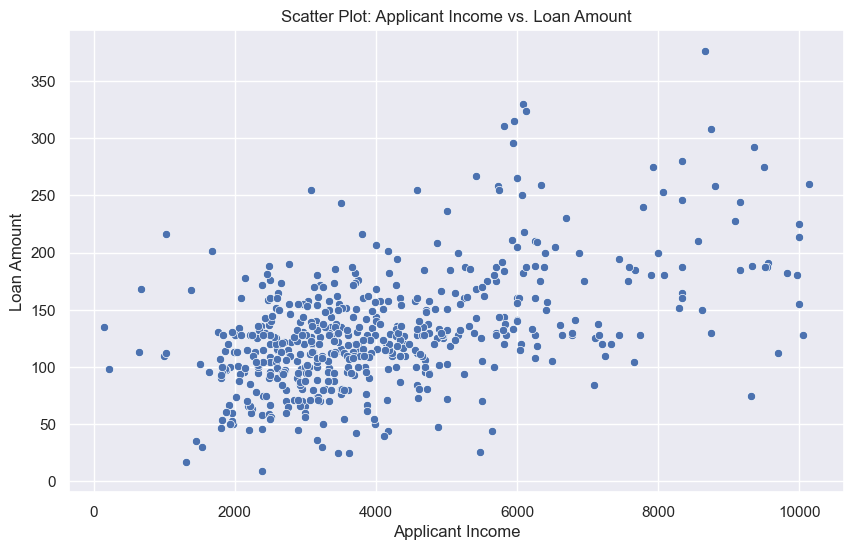

In [249]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='ApplicantIncome', y='LoanAmount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: Applicant Income vs. Loan Amount')
plt.savefig('scatterafter.png')
plt.show()







### Standardize the data - Feature Scaling

In [250]:




# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data[numerical_cols] = scaler.transform(data[numerical_cols])


### Convert categorical Columns into numerical ones

In [251]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col_to_encode = ['Gender','Dependents', 'Married', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']
for i in col_to_encode:
    data[i] = le.fit_transform(data[i])

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,-2.166223,-0.933736,-2.534051,-5.299688,1.0,2,1
1,LP001003,1,1,1,0,0,-2.166572,-0.933026,-2.534051,-5.299688,1.0,0,0
2,LP001005,1,1,0,0,1,-2.167008,-0.933736,-2.557410,-5.299688,1.0,2,1
3,LP001006,1,1,0,1,0,-2.167122,-0.932625,-2.537065,-5.299688,1.0,2,1
4,LP001008,1,0,0,0,0,-2.166181,-0.933736,-2.529153,-5.299688,1.0,2,1


In [252]:
data = data.drop(['Loan_ID'], axis = 1)

In [253]:
# Split the dataset into features (X) and target (y)

X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

model = LogisticRegression() #define the model
model.fit(X_train, y_train) #fit the model
ypred = model.predict(X_test) #predict on test sample
evaluation = f1_score(y_test, ypred)
evaluation


import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Train the model

In [254]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
ypred_log = log_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, ypred_log))
print("Precision:", precision_score(y_test, ypred_log))
print("Recall:", recall_score(y_test, ypred_log))
print("F1 Score:", f1_score(y_test, ypred_log))

Accuracy: 0.8181818181818182
Precision: 0.7898550724637681
Recall: 0.990909090909091
F1 Score: 0.8790322580645161


In [255]:
joblib.dump(model, 'finall_loan_model.pkl')

NameError: name 'joblib' is not defined